<h1 style="font-family:Corbel Light; color:#e54b87">Projet 3: Concevez une application au service de la santé publique </h1>

<h2 style="font-family:Corbel Light; color:#737373">Contexte</h2>

L’agence Santé Publique France a lancé un appel à projet autour des problématiques alimentaires. Elle souhaite trouver des idées innovantes d’applications pour améliorer l’alimentation de la population française. 

<h2 style="font-family:Corbel Light; color:#737373">Mission</h2>

Proposer une idée d’application et mener une analyse exploratoire pour vérifier que notre idée est réalisable à partir du jeu de données nutritionnelles mis à notre disposition.

Idée d'application étudiée : permettre à l’utilisateur de scanner le code barre d’un produit pour se voir proposer des produits de la même famille d’aliments, mais avec la meilleure valeur nutritionnelle possible et le plus faible degré de transformation possible. 

<h2 style="font-family:Corbel Light; color:#737373">Requirements</h2>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats as st
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import datetime as dt
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import toolbox
import textwrap
import nltk
import math
import skimage
import ssl
import re

%matplotlib inline
pd.options.display.float_format = '{:_.2f}'.format

In [2]:
python_version = !python -V
print('python version :', python_version, '\n')

print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('scipy version : ', scipy.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('seaborn version : ', sns.__version__, '\n')
print('scikit-learn version : ', sklearn.__version__, '\n')
print('nlkt version : ', nltk.__version__, '\n')
print('skimage version : ', skimage.__version__, '\n')
print('statsmodels version : ', statsmodels.__version__, '\n')

python version : ['Python 3.9.12'] 

pandas version :  1.4.2 

numpy version :  1.21.5 

scipy version :  1.9.1 

matplotlib version :  3.5.1 

seaborn version :  0.12.1 

scikit-learn version :  1.1.3 

nlkt version :  3.7 

skimage version :  0.19.2 

statsmodels version :  0.13.2 



**Versions utilisées :**

- python : Python 3.9.12
- statsmodels version :  0.13.2 
- skimage version :  0.19.2 
- scikit-learn  :  1.1.3  
- matplotlib :  3.5.1 
- seaborn    :  0.12.1
- nlkt version :  3.7 
- numpy  :  1.21.5 
- pandas :  1.4.2
- scipy  :  1.9.1 

<h2 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Étape 2</span> : Analyse exploratoire de données</h2>

<h3 style="font-family:Corbel Light; color:#737373">Inspection des données</h3>

In [3]:
food_data = pd.read_csv('food_subset_clean.csv',
                        parse_dates=['last_modified_datetime', 'created_datetime'])
food_data.shape

(235562, 20)

In [4]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235562 entries, 0 to 235561
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   code                     235562 non-null  float64       
 1   product_name             235562 non-null  object        
 2   last_modified_datetime   235562 non-null  datetime64[ns]
 3   created_datetime         235561 non-null  datetime64[ns]
 4   nutrition-score-fr_100g  214678 non-null  float64       
 5   nutrition_grade_fr       235562 non-null  object        
 6   saturated-fat_100g       235562 non-null  float64       
 7   sugars_100g              235562 non-null  float64       
 8   energy_100g              235562 non-null  float64       
 9   sodium_100g              235562 non-null  float64       
 10  salt_100g                235562 non-null  float64       
 11  proteins_100g            235562 non-null  float64       
 12  fiber_100g      

In [5]:
toolbox.missing_values_by_column(food_data)

,VARIABLES,Number of Missing Values,Missing Values (%)
0,code,0,0.00
17,creator,0,0.00
12,fiber_100g,0,0.00
11,proteins_100g,0,0.00
10,salt_100g,0,0.00
8,energy_100g,0,0.00
7,sugars_100g,0,0.00
9,sodium_100g,0,0.00
5,nutrition_grade_fr,0,0.00
2,last_modified_datetime,0,0.00


Dictionnaire utilisé pour mettre les pays en anglais

In [6]:
countries_dict = {'espagne': 'spain', 'spanien': 'spain', 'spanyolorszag': 'spain',
                  'deutschland': 'germany', 'allemagne': 'germany', 'nemetorszag': 'germany',
                  'franciaorszag': 'france', 'frankrijk': 'france', 'frankreich': 'france', 'frankrike': 'france',
                  'magyarorszag': 'hungary',
                  'nagy-britannia': 'united-kingdom', 'royaume-uni': 'united-kingdom',
                  'vereinigtes-konigreich': 'united-kingdom', 'สหราชอาณาจักร': 'united-kingdom',
                  'portugalia': 'portugal',
                  'weltweit': 'world',
                  'pays-bas': 'netherlands', 'nederland': 'netherlands', 'niederlande': 'netherlands',
                  'belgien': 'belgium', 'belgique': 'belgium', 'belgie': 'belgium',
                  'republik-china': 'china', 'republique-de-chine': 'china',
                  'schweiz': 'switzerland', 'svajc': 'switzerland', 'zwitserland': 'switzerland',
                  'sverige': 'sweden', 'zweden': 'sweden',
                  'danemark': 'denmark', 'denemarken': 'denmark',
                  'الإمارات-العربية-المتحدة': 'united-arab-emirates',
                  'australie': 'australia', 'ประเทศออสเตรเลีย': 'australia',
                  'etats-unis': 'united-states',
                  'azərbaycan': 'azerbaijan',
                  'سلطنة-عمان': 'oman',
                  'भारत': 'india',
                  'السعودية': 'saudi-arabia',
                  '香港': 'hong-kong',
                  'казахстан': 'kazakhstan',
                  'ประเทศไทย': 'thailand',
                  '日本': 'japan',
                  'czech': 'czech-republic', 'tschechien': 'czech-republic'
                  }

<h3 style="font-family:Corbel Light; color:#737373">Analyses Univariées</h3>

<h4 style="font-family:Corbel Light; color:#e54b87">Variables qualitatives</h4>

Q: De quand datent nos données ? 

À l'aide d'un histogramme on visualise l'évolution dans le temps du nombre de produits ajoutés sur le site par an

R : Il semblerait que la majorité des données datent de 2017 (rmq: nutriscore mis en place en 2017)

In [7]:
food_data = food_data.sort_values('created_datetime', ascending=False)

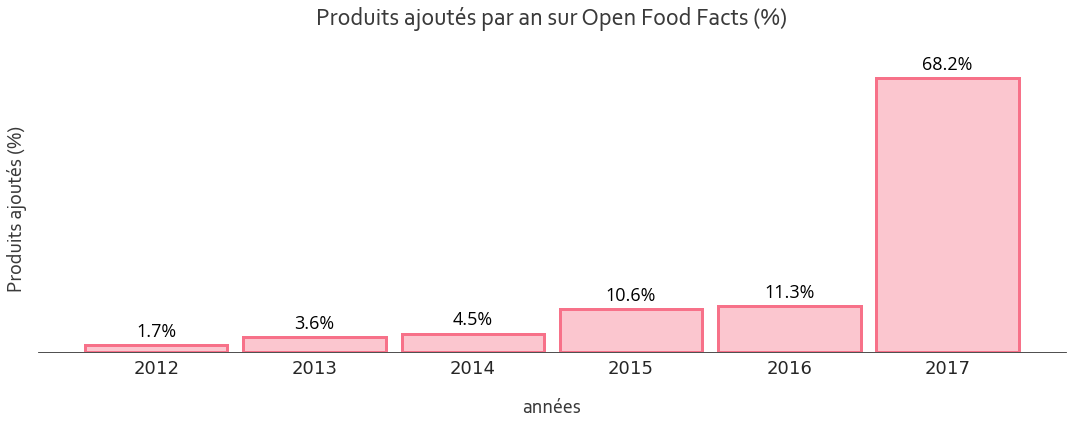

In [8]:
color = sns.color_palette("husl", 8)[0]
titles = {'chart_title': 'Produits ajoutés par an sur Open Food Facts (%)',
          'y_title': 'Produits ajoutés (%)',
          'x_title': 'années'}

toolbox.plot_empirical_distribution(food_data['created_datetime'].dt.year,
                                    color, titles, (15, 6))

***

***

Q: Dans quels pays sont disponibles les produits de notre jeu de données ? 

À l'aide d'un histogramme on visualise la distribution empirique de la variable 'countries_tags'

R: Les produits du jeu de données semblent être majoritairement en vente aux Etats-unis et en France

(rmq: nutriscore utilisé en France, Belgique, Allemagne, Luxembourg, Pays-Bas, Espagne et Suisse)

In [9]:
countries_frequency_df = toolbox.count_countries(food_data, 'countries_tags', 0.01, countries_dict)

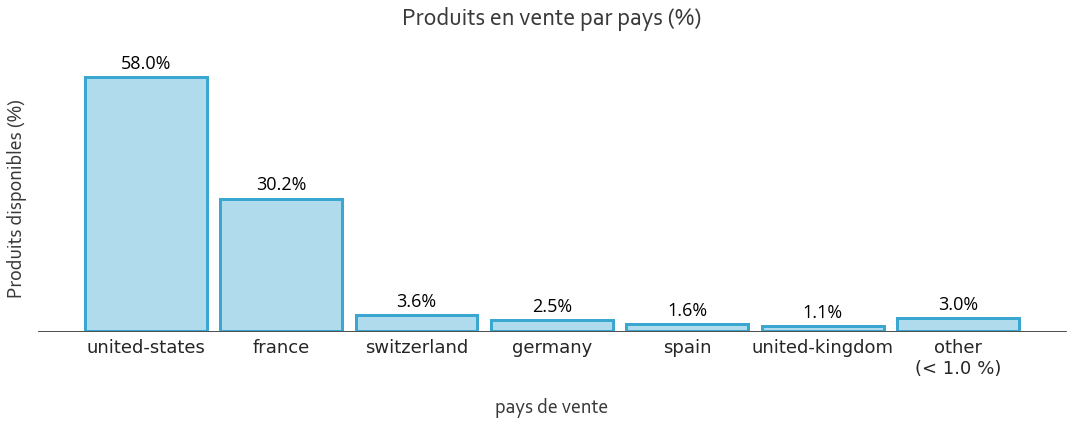

In [10]:
color = sns.color_palette("husl", 8)[5]
titles = {'chart_title': 'Produits en vente par pays (%)',
          'y_title': 'Produits disponibles (%)',
          'x_title': 'pays de vente'}

toolbox.plot_empirical_distribution(countries_frequency_df['countries'], color, titles, (15, 6))

***

***

Q: Qui sont les personnes qui ont renseigné les données sur Open Food Facts (que des particuliers ?)

À l'aide d'un diagramme à barre on visualise la distribution empirique de la variable 'creators'

In [11]:
creator_frequency_df = toolbox.build_frequency_df_with_thresh(food_data,
                                                              'creator',
                                                              0.01,
                                                              'autres (contribution < {} %)')

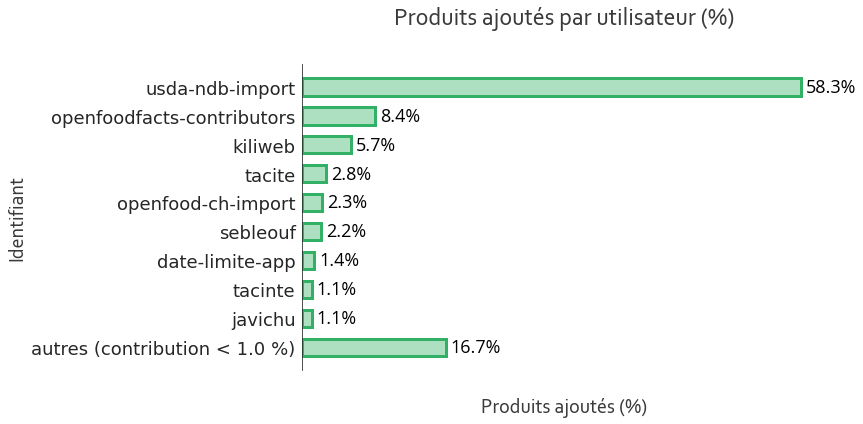

In [12]:
color = sns.color_palette("husl", 8)[3]
titles = {'chart_title': 'Produits ajoutés par utilisateur (%)',
          'y_title': 'Identifiant',
          'x_title': 'Produits ajoutés (%)'}

toolbox.plot_empirical_distribution(creator_frequency_df['creator'], color, titles, (12, 6), vertical=False)

R: 58% des données ont été importées par le Département de l'Agriculture des Etats Unis (USDA) (un peu surprenant OpenFoodFacts et le Nutri-score sont des initiatives françaises) 

Les données ont été importées en une fois (le 09/10 mars 2017) pour des produits vendus aux états-unis (sauf 9). Ce qui explique pourquoi la majorité des données concernent des produits vendus aux états-unis. 

In [13]:
usda_data = food_data.loc[food_data['creator'] == 'usda-ndb-import'].copy()

In [14]:
usda_data['created_datetime'].unique()

array(['2017-03-10T00:00:00.000000000', '2017-03-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [15]:
usda_data['countries_tags'].value_counts()

en:united-states             137281
en:france                         9
en:spain,en:united-states         1
Name: countries_tags, dtype: int64

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Variables quantitatives</h4>

In [16]:
columns_100g = toolbox.get_columns_contains(food_data, '_100g', ['nutrition-score-fr_100g'])
food_data.describe().loc[:, columns_100g]

,saturated-fat_100g,sugars_100g,energy_100g,sodium_100g,salt_100g,proteins_100g,fiber_100g
count,235_562.00,235_562.00,235_562.00,235_562.00,235_562.00,235_562.00,235_562.00
mean,4.94,14.84,1_159.77,0.49,1.25,7.74,2.29
std,7.34,19.57,748.96,1.55,3.91,7.98,4.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.40,444.00,0.05,0.13,2.10,0.00
50%,2.01,5.13,1_151.00,0.27,0.68,5.60,0.60
75%,7.00,22.39,1_674.00,0.55,1.40,10.71,3.20
max,100.00,100.00,3_764.00,83.00,100.00,100.00,100.00


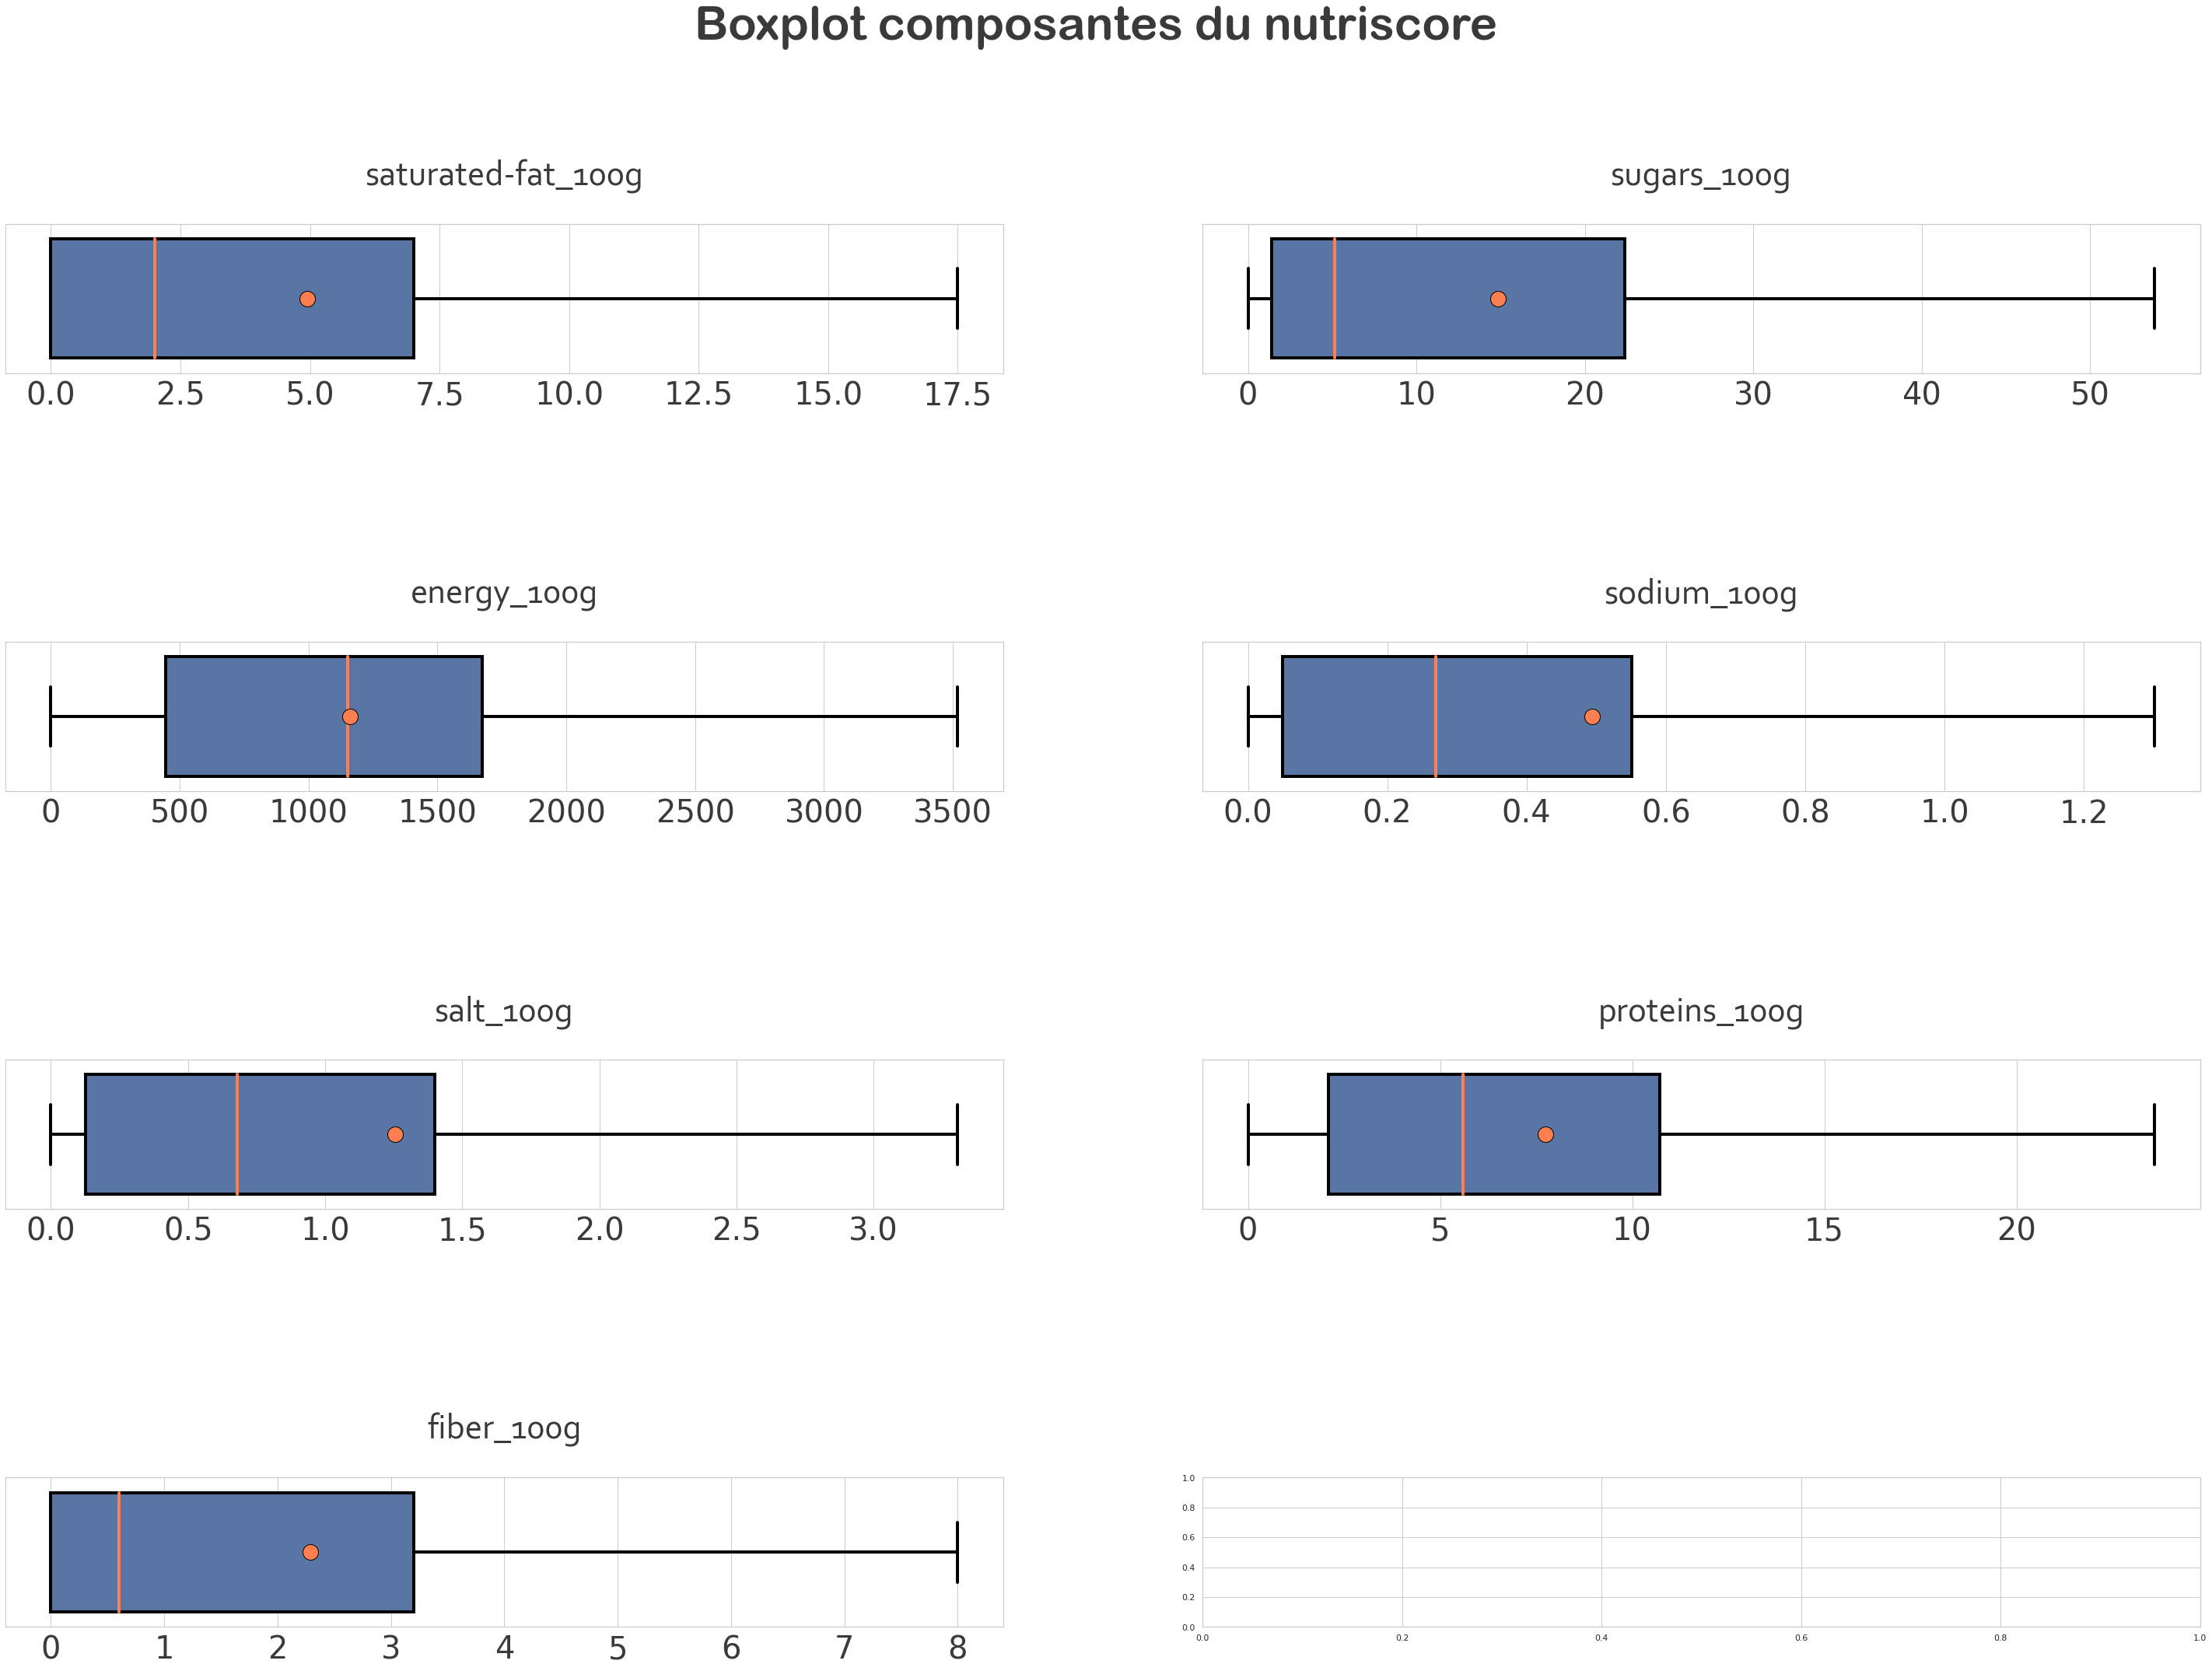

In [17]:
toolbox.plot_boxplot_by_dimension(food_data, columns_100g, 2, 'composantes du nutriscore', (40, 30))

<h3 style="font-family:Corbel Light; color:#737373">Analyses Bivariées</h3>

<h4 style="font-family:Corbel Light; color:#e54b87">Variable qualitative vs qualitative</h4>

On veut étudier la relation entre les familles d'aliments (pnns1) et le nutrigrade

Q: Certaines catégories de produits ont-elles toujours le même nutrigrade ?

In [18]:
titles = {'chart_title': 'Tableau de contingence',
          'y_title': 'Familles d\'aliments',
          'x_title': 'nutrigrades'}

Statistique du chi2: 39193.015827003735


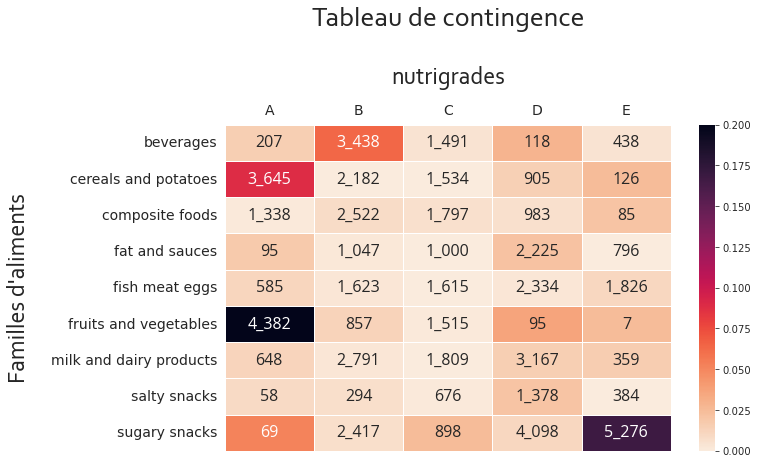

In [19]:
food_data['nutrition_grade_fr'] = food_data['nutrition_grade_fr'].str.upper()
contingence_table = pd.crosstab(food_data['pnns_groups_1'],
                                food_data['nutrition_grade_fr'],
                                dropna=True,
                                margins=True,
                                margins_name="Total")

xi_table, xi_n = toolbox.build_xi_table(contingence_table)
print('Statistique du chi2:', xi_n)

toolbox.plot_heatmap(xi_table.iloc[:-1, :-1],
                     round(xi_table.max().max(), 1),
                     titles,
                     (10, 6),
                     'd',
                     annotation=contingence_table.iloc[:-1, :-1])

Test d'indépendance du chi-2 : 

- H0 : les variables sont indépendantes
- H1 : les variables sont corrélées

On fixe un niveau de test à 1% et on calcule la p_value. Si p_value < 1% alors on peut rejeter H0.

In [20]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(contingence_table)
print('Statistique du chi2:', st_chi2, '\np_value:', st_p)

Statistique du chi2: 39193.015827003735 
p_value: 0.0


On retrouve la statistique du chi2 calculée à la main. 
 
On rejette très largement l'hypothèse d'indépendance des deux variables au niveau de test 1%

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Variable qualitative vs quantitative</h4>

À l'aide d'un histogramme on fait ressortir la distribution des nutri-scores en fonction des nutri-grades

Nutri-grades : plutôt bien répartis, un peu plus de D que des autres. Environ 50% A, B, E et 50% D, C

In [21]:
mask_gp2 = ~food_data['pnns_groups_2'].isnull()
mask_nutriscore = ~food_data['nutrition-score-fr_100g'].isnull()
food_nutri = food_data.loc[(mask_gp2) & (mask_nutriscore)].sort_values('nutrition_grade_fr')

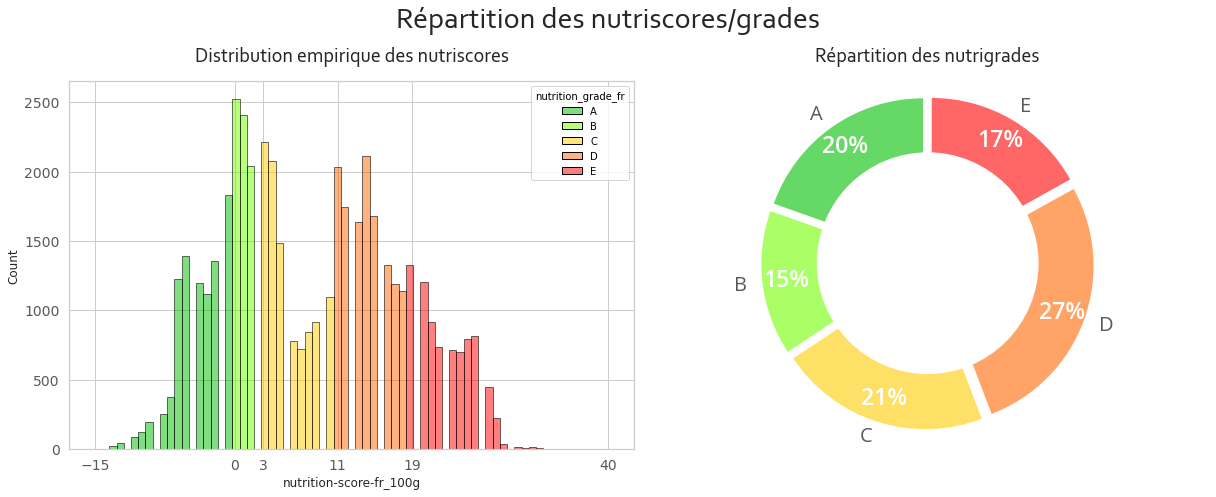

In [22]:
titles = {'suptitle': 'Répartition des nutriscores/grades',
          'hist_title': 'Distribution empirique des nutriscores',
          'donut_title': 'Répartition des nutrigrades'}

palette_nutriscore = ['#00BF00', '#73FF00', '#FFCC00', '#FF6600', '#FF0000']

toolbox.plot_hist_and_donut(food_nutri, 'nutrition-score-fr_100g',
                            'nutrition_grade_fr', palette_nutriscore, '#595959', titles, (17, 7))

***

***

On va étudier l'influence du facteur géographique sur la valeur nutritionnelle des produits vendus (cela n'aurait pas de sens de comparer des produits de catégories différentes et il semble difficile de construire des échantillons avec la même proportion de catégories pour chaque pays, donc on compare juste les produits de la catégorie 'sauces et vinaigrettes').

On prend les 5 pays les plus représentés : Etats-Unis, France, Suisses, Espagne, Allemagne

In [51]:
food_data_sauces = food_data.loc[(mask_nutriscore) & (food_data['pnns_groups_2'] == 'dressings and sauces')]

In [52]:
list_france = ['france', 'franciaorszag', 'frankrijk', 'frankreich', 'frankrike']
list_usa = ['united-states', 'etats-unis']
list_spain = ['spain', 'espagne',  'spanien', 'spanyolorszag']
list_germany = ['germany', 'deutschland',  'allemagne', 'nemetorszag']
list_swiss = ['switzerland', 'schweiz',  'svajc', 'zwitserland']

list_countries = [list_france, list_usa, list_spain, list_germany, list_swiss]

country_df = toolbox.extract_country_data(food_data_sauces, 'countries_tags', list_countries, 'nutrition-score-fr_100g')

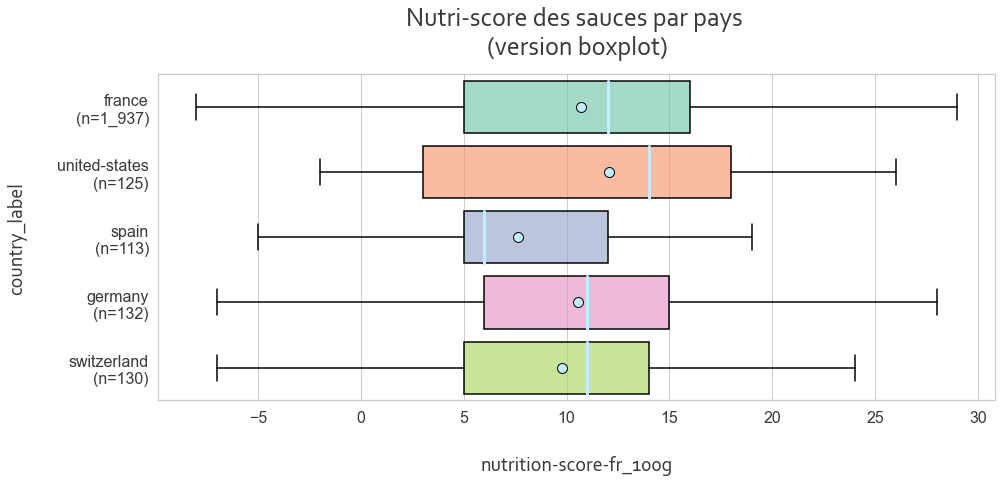

In [25]:
toolbox.plot_boxplot(country_df,
                     'nutrition-score-fr_100g',
                     'Nutri-score des sauces par pays \n(version boxplot)',
                     (15, 6),
                     'country_label')

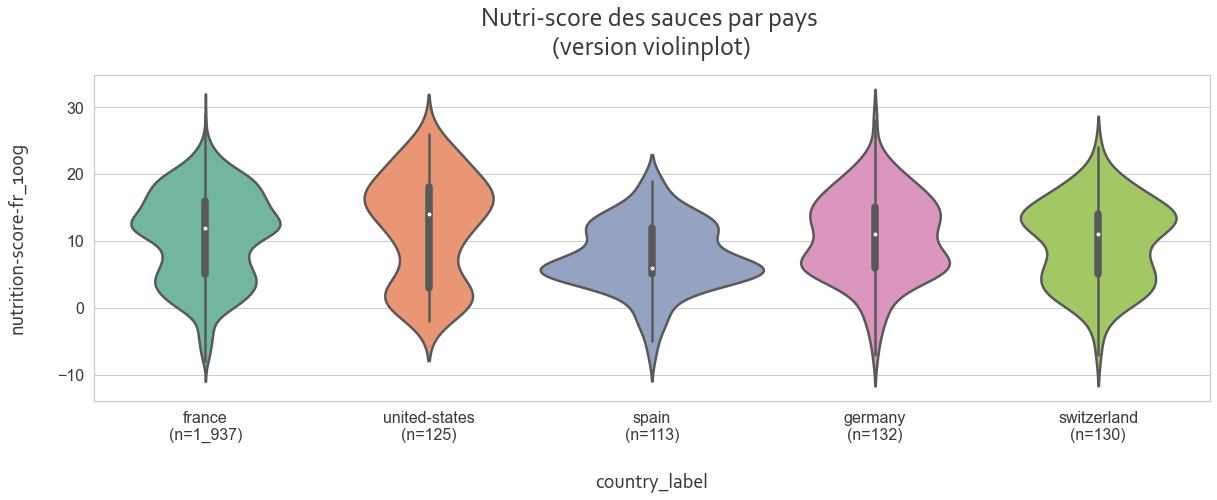

In [26]:
toolbox.plot_violinplot(country_df,
                        'nutrition-score-fr_100g',
                        'Nutri-score des sauces par pays \n(version violinplot)',
                        (20, 6),
                        'country_label')

Pour que les résultats de l'ANOVA soient fiables nos données doivent valider les hypothèses suivantes:

- indépendance intra et inter échantillons
- égalité des variances (test de Bartlett)
- normalité des erreurs expérimentales/résidus (test de Shapiro-Wilk)

1) Indépendance des échantillons 

Seul le contexte de l’étude permet de s’assurer de l’indépendance entre les échantillons de chaque groupe. 

Il est possible qu'un même produit soit vendu dans plusieurs pays et donc présent dans plusieurs échantillons, qu'une même marque ait fabriqué plusieurs produits différents (en utilisant des ingrédients similaires) ... 

On ne sait pas si l'hypothèse d'indépendance est vérifiée.

2) Egalité des variances

L’amplitude des boîtes des boxplots traduit graphiquement l’égalité ou non des variances. Graphiquement il semblerait que nos variances ne soient pas égales. 

In [59]:
country_df.groupby("country")['nutrition-score-fr_100g'].agg('var')

country
france          45.65
germany         37.96
spain           25.28
switzerland     37.58
united-states   59.74
Name: nutrition-score-fr_100g, dtype: float64

Le test de bartlett permet de tester si les variances sont significativement différentes ou non.

- H0 : Les variances de chaque groupe sont égales 
- H1 : Les variances de chaque groupe ne sont pas toutes égales

Niveau de test 1%

In [69]:
st.bartlett(*[group['nutrition_score_fr_100g'].values for name, group in country_df.groupby("country")])

BartlettResult(statistic=24.77124654702316, pvalue=5.5928188824707197e-05)

p_value < 0.01 -> On peut largement rejeter H0, les variances ne sont pas toutes égales.

On pourrait s'arreter là pour rejeter l'ANOVA, mais on va quand même regarder la distribution des résidus (pour l'exercice).

3) Normalité des résidus

L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk

- H0 : Les résidus suivent une loi normale
- H1 : Les résidus ne suivent pas une loi normale

Niveau de test 1%

In [65]:
country_df.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'}, inplace=True)
model = ols('nutrition_score_fr_100g ~ country', data=country_df).fit()
st.shapiro(model.resid)

ShapiroResult(statistic=0.9834931492805481, pvalue=3.238112724937808e-16)

p_value < 0.01 -> on rejette très largement H0, les résidus ne suivent pas une loi normale. 

Aucune des conditions pour effectuer une ANOVA n'est validée. Il n'est donc pas conseillé de l'utiliser car les résultats ne seraient pas fiables.
On va donc utiliser une alternative non-paramétrique, le test de Kruskal-Wallis (un test robuste qui s'applique à la médiane). Il n'y a pas besoin de remplir des conditions préalables pour l'appliquer. 

Test de Kruskal-Wallis: 

- H0 : Le pays n'a aucune influence sur la valeur nutritionnelle du produit (égalité des médianes)
- H1 : Le pays influe sur la valeur nutritionnelle du produit . (Une médiane s'écarte significativement des autres)

Niveau de test : 1%

In [70]:
st.kruskal(*[group['nutrition_score_fr_100g'].values for name, group in country_df.groupby("country")])

KruskalResult(statistic=32.673263805018955, pvalue=1.393335299972153e-06)

p_value < 0.01 donc on peut largement rejeter H0, le facteur géographique aurait à priori un impact sur la valeur nurtritionnelle des produits

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Variable quantitative vs quantitative</h4>

On va regarder la relation entre les composantes du nutriscore 2 à 2

In [30]:
'{:_}'.format(food_data.shape[0])

'235_562'

In [31]:
food_data_sample = resample(food_data, random_state=0, n_samples=1000)

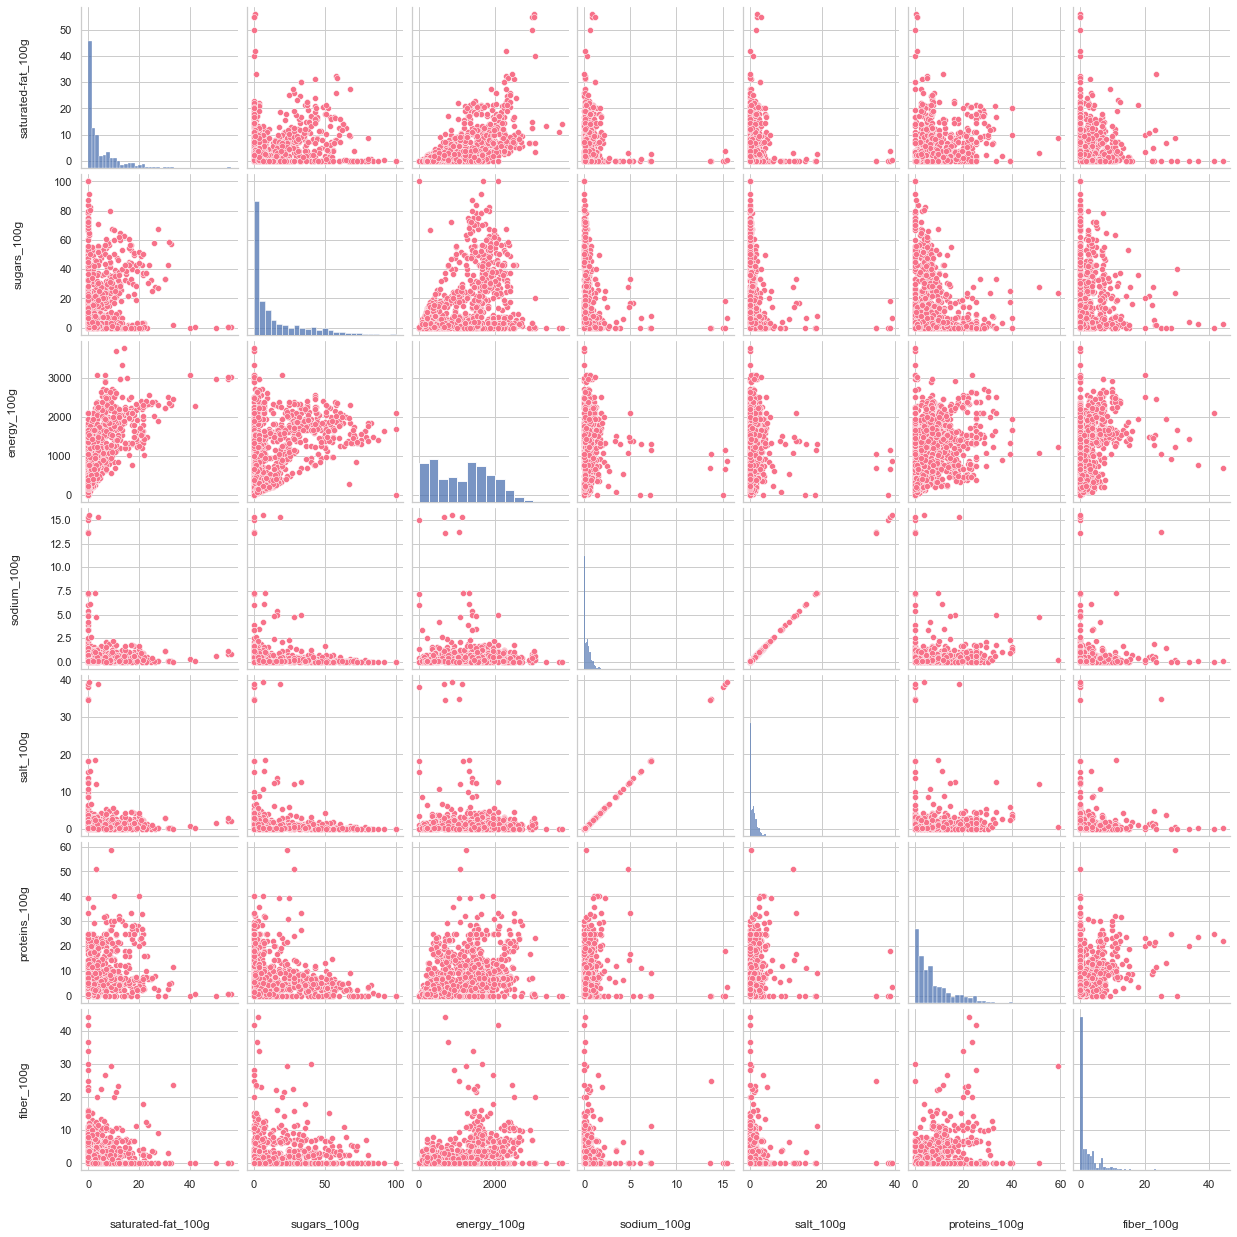

In [32]:
color = sns.color_palette("husl", 8)[0]

sns.pairplot(food_data_sample,
             vars=columns_100g,
             plot_kws=dict(color=color),
             dropna=True)

Matrice de corrélation

In [33]:
correlation_matrix = food_data[columns_100g].corr()

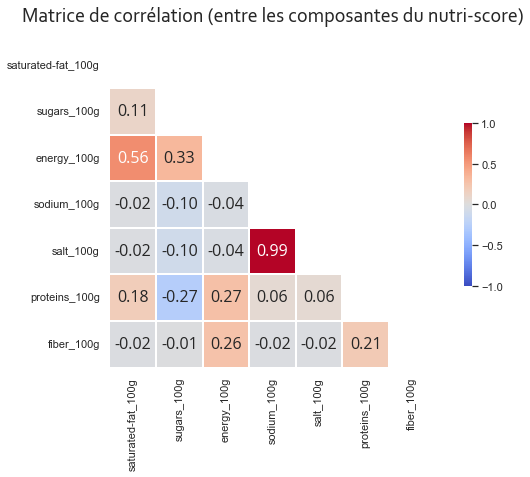

In [34]:
toolbox.plot_heatmap_correlation_matrix(correlation_matrix,
                                        'Matrice de corrélation (entre les composantes du nutri-score)',
                                        (10, 6),
                                        'coolwarm')

<h3 style="font-family:Corbel Light; color:#737373">Analyse en composantes principales</h3>

In [35]:
nutrients = toolbox.get_columns_contains(food_data, '_100g', ['nutrition-score-fr_100g', 'sodium_100g'])
X = food_data[nutrients]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

pca = PCA(n_components=len(nutrients))
X_proj = pca.fit_transform(X_scaled)

<h4 style="font-family:Corbel Light; color:#e54b87"">Eboulis des valeurs propres</h4>

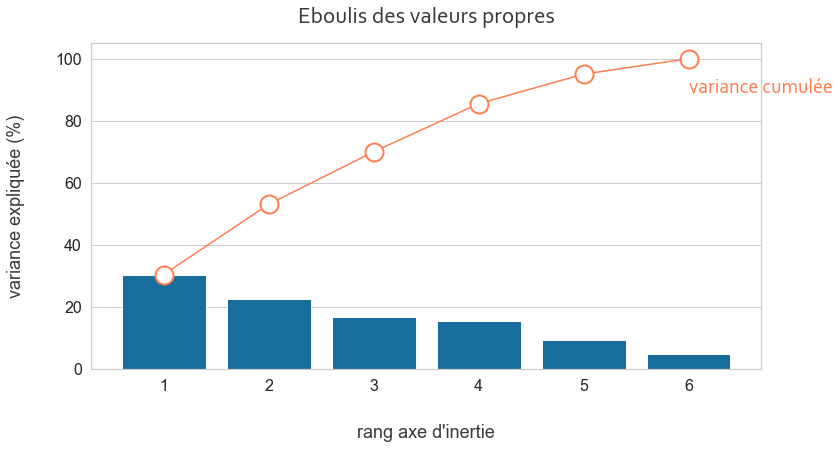

In [37]:
titles = {'chart_title': 'Eboulis des valeurs propres',
          'x_label': 'rang axe d\'inertie',
          'y_label': 'variance expliquée (%)'}

toolbox.plot_screeplot(pca,
                       len(nutrients),
                       (12, 6),
                       titles,
                       sns.desaturate(sns.color_palette('colorblind')[0], 0.75)
                       )

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Composantes</h4>

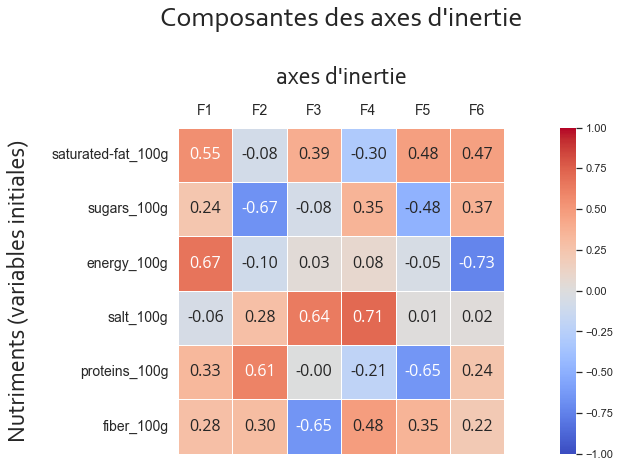

In [38]:
pcs_df = pd.DataFrame(data=pca.components_,
                      index=['F' + str(s) for s in range(1, len(nutrients) + 1)],
                      columns=nutrients)
titles = {'chart_title': 'Composantes des axes d\'inertie',
          'y_title': 'Nutriments (variables initiales)',
          'x_title': 'axes d\'inertie'}

toolbox.plot_heatmap(pcs_df.T, 1, titles, (20, 6),
                     "0.2f", True, -1, 'coolwarm', True)

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Cercle des corrélations</h4>

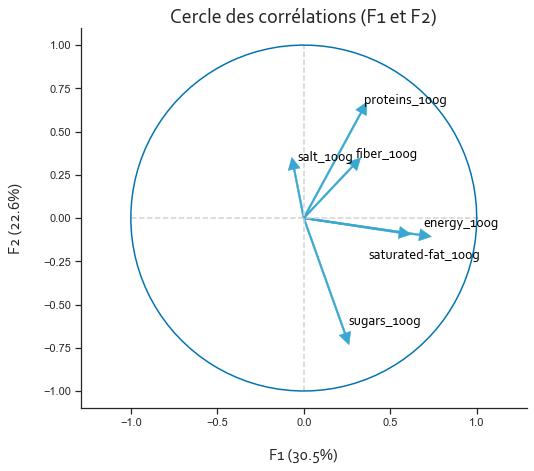

In [39]:
toolbox.plot_correlation_circle(pca, 0, 1, (8, 7), nutrients, sns.color_palette('husl', 8)[5])

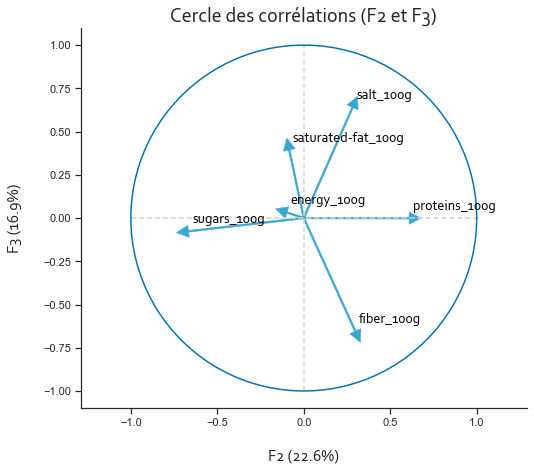

In [40]:
toolbox.plot_correlation_circle(pca, 1, 2, (8, 7), nutrients, sns.color_palette('husl', 8)[5])

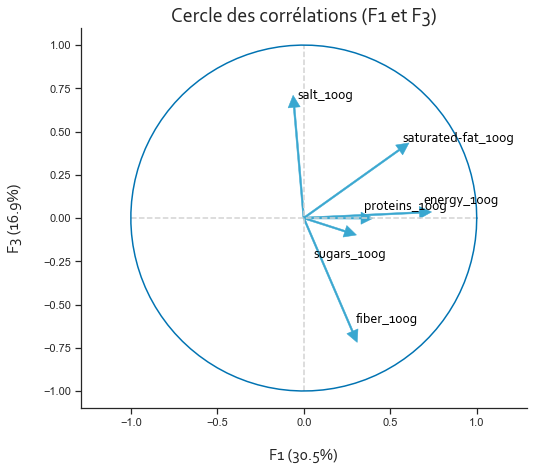

In [41]:
toolbox.plot_correlation_circle(pca, 0, 2, (8, 7), nutrients, sns.color_palette('husl', 8)[5])

F1 : positivement corrélé avec les acides gras saturés et l'énergie -> Facteur énergétique 
(coefficient de correlation linéaire entre énergie et acides gras saturés = 0.56 comme vu dans la matrice de corrélation)

F2 : anticorrélé avec sucre et positivement corrélé avec les protéines -> aliments riches en protéines et peu sucrés 
(coefficient de correlation linéaire entre sucre et protéines = -0.27 comme vu dans la matrice de corrélation)

F3 : anticorrélé avec fibres et positivement corrélé avec le sel - > aliments salés et faibles en fibres 
(coefficient de correlation linéaire entre sel et fibres = -0.02 comme vu dans la matrice de corrélation)

***

***

<h4 style="font-family:Corbel Light; color:#e54b87">Projection du nuage des individus dans un plan factoriel</h4>

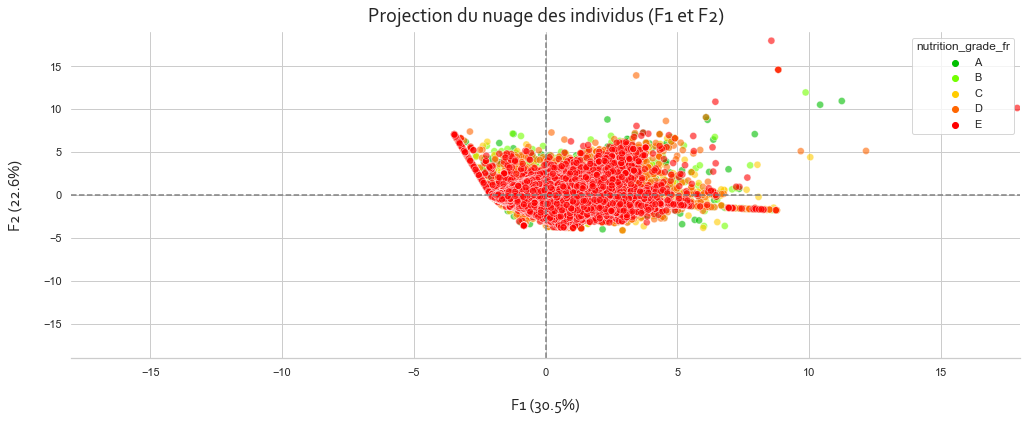

In [42]:
X_proj_df = toolbox.display_pca_scatterplot(pca, 0, 1, X_proj,
                                            len(nutrients), (17, 6), True,
                                            food_data['nutrition_grade_fr'],
                                            palette_nutriscore
                                            )

On y voit pas grand chose

On aurait pu essayer de faire un clustering et n'afficher que les centres de gravité des groupes

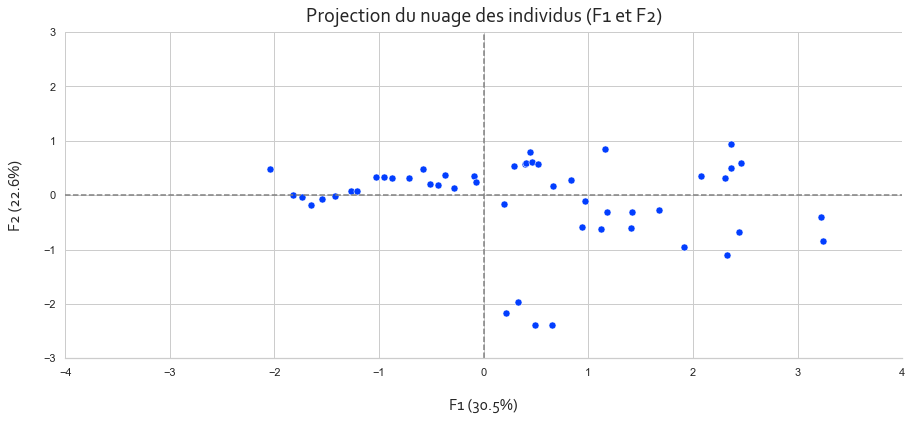

In [43]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(X.values)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
food_data['labels'] = labels

centroids_scaled = scaler.transform(centroids)
centroids_proj = pca.transform(centroids_scaled)

centroid_proj_df = toolbox.display_pca_scatterplot(pca, 0, 1, centroids_proj, len(nutrients), (15, 6))

In [44]:
centroid_proj_df.sort_values(['F1', 'F2'], ascending=False).head()

,F1,F2,F3,F4,F5,F6
10,3.24,-0.85,1.41,-1.07,1.91,-1.70
5,3.22,-0.41,1.39,-1.03,2.07,-0.57
35,2.46,0.59,-0.04,-0.16,0.26,-0.61
23,2.44,-0.67,0.96,-0.72,1.38,-1.85
27,2.36,0.94,-0.44,0.06,0.04,-0.49


Q1 : Différence entre les individus avec une abscisse (i.e. F1) grande et ceux avec une abscisse petite : valeur énergétique
- centroid avec une abscisse élevée (4.04) : aliments avec une valeur énergétique élevée et plutôt gras (entre 3 029Kj et 3 234Kj avec mediane = 3 067Kj) (ex: beurre, cookie dough, mayo)
- centroid avec une abscisse faible (-2.04) : aliments avec une valeur énergétique faible (entre 0Kj et 46Kj avec mediane = 9Kj) (ex: fruits/légumes, café, bouillon de poulet)

Q2 : Différence entre 2 individus avec la même abscisse (F1) mais des ordonnées (F2) différentes : quantité de sucre
- centroid avec x=0.65 et y=-1.99 : aliments à haute valeur énergétique (1615Kj/1700Kj) et plutôt sucrés (entre 38g et 100g avec médiane=68g) (muesli avec fruits, céréales pour le petit dej, barres de céréales, brownies ...)
- centroid avec x=0.63 et y=0.43 : aliments à haute valeur énergétique  (1519Kj/1590Kj) mais peu sucrés (entre 0g et 52g avec médiane = 3.5g)(graines de lin, de chia, tortillas chips)

Q3: Différence entre 2 individus avec composantes similaires pour F1 et F2 mais très différentes pour F3 : quantité de fibres

difficile à voir avec les centroids
- individu avec 7.36/0.97 et -0.96 : pétales de coco non-sucrés (valeur énergétique élevée (3 067Kj) très riche en fibres (26.70g)
- individu avec 7.34/0.74 et 2.48  : amandes en poudre (même type de produit valeur énergétique élevée (2 570Kj), peu sucré (5.50g)) mais moins de fibres (9.40g))

<h2 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Étape 3</span> : Présentation de l'idée d'application</h2>

- l'utilisateur entre le code-barres de son produit, 
- l'application lui propose des produits de la même catégorie mais avec un meilleur nutriscore et le moins d'additifs possible

Rmq : l‘approche bag of words est utilisée pour sélectionner les produits avec un nom similaire au produit initial. 

In [45]:
food_data_app = food_data.loc[mask_gp2].copy()
palette_nutriscore_dict = {'A': '#00BF00',
                           'B': '#73FF00',
                           'C': '#FFCC00',
                           'D': '#FF6600',
                           'E': '#FF0000'}

On génère une liste de codes-barres pour tester l'application (on peut aussi essayer de rentrer des faux codes-barres)

*Remarque: les premiers codes-barres correspondent à des nutri-grades A*

In [46]:
n_samples = 20
codes = food_data_app.groupby('nutrition_grade_fr',
                              group_keys=False).apply(lambda x: x.sample(min(len(x), math.ceil(n_samples/5))))['code']
list(codes.values)

[3580281070154.0,
 3560070208852.0,
 3564700008812.0,
 3660992000395.0,
 8859015700038.0,
 8715700061009.0,
 3564700459447.0,
 3023290719848.0,
 3560070419968.0,
 3564700559307.0,
 3270160646326.0,
 3760061027299.0,
 3760133470008.0,
 3350033086951.0,
 8480017089373.0,
 3760083785337.0,
 3256760003219.0,
 3425850016006.0,
 8593893720589.0,
 4000161470779.0]

Faire tourner la cellule de code ci-dessous pour tester l'application : 

Veuillez entrer le code-barres:  3242611000032.0


Ce code barre correspond à : Sirop de Grenadine - NutriScore E
Recherche de meilleures alternatives 🧐 



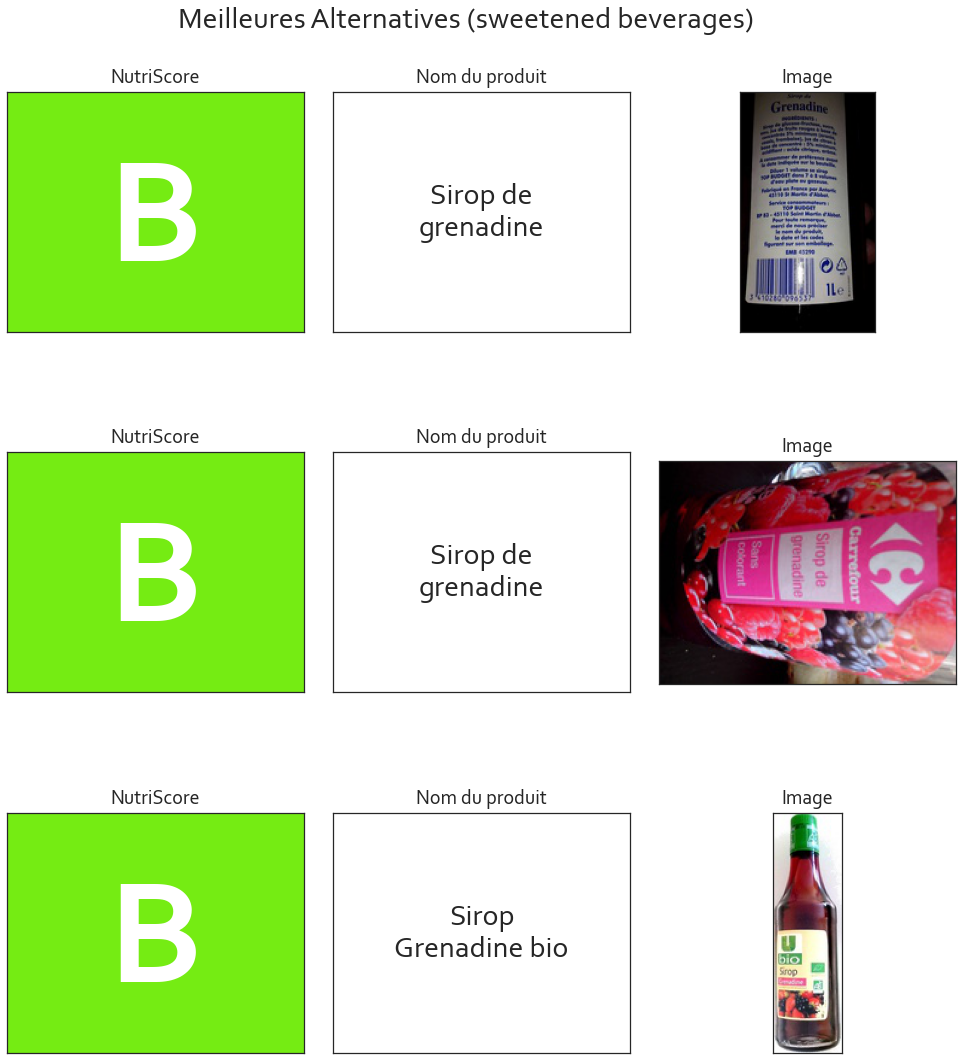

In [49]:
toolbox.application_nutriscore(food_data_app, 3,
                               palette_nutriscore_dict,
                               'code', 'pnns_groups_2',
                               'nutrition_grade_fr', 'additives_n',
                               'product_name', 'image_small_url'
                               )

<h2 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Conclusion</span></h2>

Concernant la qualité des données :
- Les données sont assez anciennes et essentiellement américaines alors qu’on vise un public français. 
- Il manque des données pour beaucoup de variables (ex: image, marque, ingrédients) 
- Le nettoyage est difficile : il s'agit d'un jeu rempli par des bénévoles, il peut donc y avoir des erreurs voire des données "trolls" i.e. certaines personnes ont fait exprès de remplir n'importe quoi. En effet, certains produits ne sont pas de la nourriture (DVD – cordes de guitare – crème pour les mains) mais des quantités de sucres, sels etc ... ont été renseignées. 

De plus nous sommes limités dans la réalisation de notre application :
- On n'a pas d’indicateur du degré de transformation des aliments dans ce jeu de données. J'avais également envisagé d'étoffer l’application avec des critères écologiques et/ou bio pour aider les utilisateurs à consommer des produits fabriqués près de chez eux, bio de préférence. On voit bien qu’il n’y a pas de variables suffisamment renseignées à ce sujet dans ce jeu de données. 

Sur une note plus positive, on a réussi à isoler un sous ensemble de données cohérent pour faire tourner notre fonction "prototype". De plus ce projet m'a permis d’apprendre beaucoup de choses, notamment d’avoir un premier aperçu de ce que peut être le machine learning. 